# Comparison of Preranked Gene Set Enrichment analysis(GSEA), traditional GSEA and fGSEA in Python and R

Author: Shakira Agata 

This Jupyter notebook describes the steps for the execution and comparison of methods: preranked GSEA, traditional GSEA and fGSEA (Fast Gene Set Enrichment Analysis). My goal was to identify the potential difference in outcomes when using three different methods of GSEA: preranked GSEA from GSEApy, traditional GSEA from GSEApy and fGSEA from Bioconductor(1,2). I did this by comparing the outcomes in identified pathways, calculated Enrichment Scores (ES) and Normalized Enrichment Scores for the three methods. The comparison was made using the data for Ag+ and control at 24 hours from ArrayExpress dataset: E-MEXP-3583. This dataset looked at  the effect of Ag+ and AgNPs on the gene expression in a human lung epithelial cell line A549. 

This notebook is subdivided into the following two sections:

* Section 1: Preranked GSEA
  * Section 1.1: System preparation
  * Section 1.2: Generation of the RNK file
  * Section 1.3: Selection of the geneset
  * Section 1.4: Execution of GSEA
* Section 2: Traditional GSEA
  * Section 2.1: Generation of expression data frame
  * Section 2.2: Generation of the CLS file
  * Section 2.3: Selection of the geneset
  * Section 2.4: Execution of GSEA
* Section 3: fGSEA
  * Section 3.1 Magic R extension and system preparation
  * Section 3.2 Execution of fGSEA
* Section 4: Session information for Python and R
  * Section 4.1: Python session information
  * Section 4.2: R session information

## Section 1: Preranked GSEA

In this section, the preranked GSEA method will be used which allows users to select the ranking method for the comparison of two group of samples (e.g control and treatment). In this case, the differential gene expression results for the comparison of Ag+ to the control at 24h was used to allow for the calculation of the ranking by the log2FC. This ranking method is used in the formal documentation of GSEA and can be used as option in fGSEA and Clusterprofiler GSEA in Rstudio (1).

### Section 1.1: System preparation

**Step 1.** The necessary packages for using this pipeline are first installed.

In [ ]:
import pandas as pd
from gseapy.plot import gseaplot
import gseapy as gp
import numpy as np
import matplotlib.pyplot as plt
from gseapy import dotplot
pip install watermark

### Section 1.2: Generation of the RNK file

**Step 2.** Next, you load the data from E-MEXP3583 into a dataframe.

In [ ]:
df1 = pd.read_csv('topTable_Ag._.1.3_24 - H2O.control_.0.0_24-try.csv').dropna()
df1

,GeneID,meanExpr,log2FC,log2FC SE,p-value,adjpvalue
0,4490,9.925881,3.935193,0.206737,9.842270e-11,0.000002
1,4495,9.561522,4.109887,0.243653,3.924060e-10,0.000004
2,79974,6.381454,2.532636,0.174021,2.094514e-09,0.000011
3,4489,12.843381,2.498127,0.172052,2.150589e-09,0.000011
4,1638,6.429810,2.349836,0.170834,3.954792e-09,0.000016
...,...,...,...,...,...,...
20513,391257,6.462645,-0.000055,0.146291,9.996750e-01,0.999870
20514,10078,8.351476,-0.000037,0.128166,9.997478e-01,0.999894
20515,84328,9.130185,-0.000033,0.167015,9.998260e-01,0.999923
20516,253018,7.162925,-0.000015,0.199487,9.999336e-01,0.999982


**Step 3.** The dataframe is reformatted so that the geneID and log2FC columns are kept. In this case, the log2FC used as the rank and thus the name of the column:log2FC is changed to 'Rank'.

In [ ]:
df2= df1[['GeneID','log2FC']]
df3= df2.rename(columns={'log2FC':'Rank'})
df3

,GeneID,Rank
0,4490,3.935193
1,4495,4.109887
2,79974,2.532636
3,4489,2.498127
4,1638,2.349836
...,...,...
20513,391257,-0.000055
20514,10078,-0.000037
20515,84328,-0.000033
20516,253018,-0.000015


**Step 4.** The datatype of the first column of df3 is changed to a string as needed for the GSEA function we will use in section 1.4. The 'Rank' column will remain unnchanged as rank needs to remain numeric for the GSEA function. We also remove duplicates as duplicates will raise errors when running GSEA.

In [ ]:
df3['GeneID']=df3['GeneID'].astype(str)
ranking=df3.drop_duplicates(subset="GeneID", keep="first")

### Section 1.3 Selection of the geneset

**Step 5.** Here, you can select the geneset of interest. The command below displays the available options. In this notebook, the ENTREZ ID version of WikiPathways 2024 Human will be used.

In [ ]:
names = gp.get_library_name()

### Section 1.4: Execution of preranked GSEA

**Step 6.** Preranked GSEA can be executed by selection of the RNK file and gene set. The seed, min_size, max_size and permutation number were set to those below in accordance with the formal documentation of GSEAPY. The permutation type was set to 'gene_set' as we have less than 15 samples and verbose was set to TRUE to get more insight into the GSEA process(1).

In [ ]:
Preranked_GSEA= gp.prerank(rnk=ranking, 
                     gene_sets='c2.cp.wikipathways.v2024.1.Hs.entrez.gmt', 
                     min_size=5, 
                     max_size=1000, 
                     permutation_type='gene_set',
                     seed=6, 
                     permutation_num=1000, 
                     verbose=True)

2025-02-25 21:00:27,262 [INFO] Parsing data files for GSEA.............................
2025-02-25 21:00:27,340 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2025-02-25 21:00:27,345 [INFO] 0830 gene_sets used for further statistical testing.....
2025-02-25 21:00:27,347 [INFO] Start to run GSEA...Might take a while..................
2025-02-25 21:01:46,007 [INFO] Congratulations. GSEApy runs successfully................



**Step 7.** In the next step, the results are displayed and visualized.

In [ ]:
Preranked_GSEA.res2d.head(5)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,WP_COPPER_HOMEOSTASIS,0.758562,2.676049,0.0,0.0,0.0,12/53,2.46%,4495;4490;4501;4489;4494;4496;4493;84560;4500;...
1,prerank,WP_ZINC_HOMEOSTASIS,0.816562,2.670822,0.0,0.0,0.0,15/37,5.27%,4495;4490;4501;4489;4494;7780;4496;7779;4493;8...
2,prerank,WP_GENES_RELATED_TO_PRIMARY_CILIUM_DEVELOPMENT...,-0.546802,-2.576323,0.0,0.0,0.0,60/101,27.17%,55764;8100;132320;23322;57539;23059;79659;5508...
3,prerank,WP_BARDETBIEDL_SYNDROME,-0.540727,-2.417239,0.0,0.0,0.0,42/86,20.25%,55764;132320;2736;5311;5727;57539;23059;79659;...
4,prerank,WP_CILIOPATHIES,-0.470576,-2.415103,0.0,0.0,0.0,78/181,20.38%,1063;55764;132320;4751;2736;5311;4867;219844;2...


C:\Users\shaki\anaconda3\Lib\site-packages\gseapy\plot.py:738: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[self.colname] = df[self.colname].replace(0, np.nan).bfill()


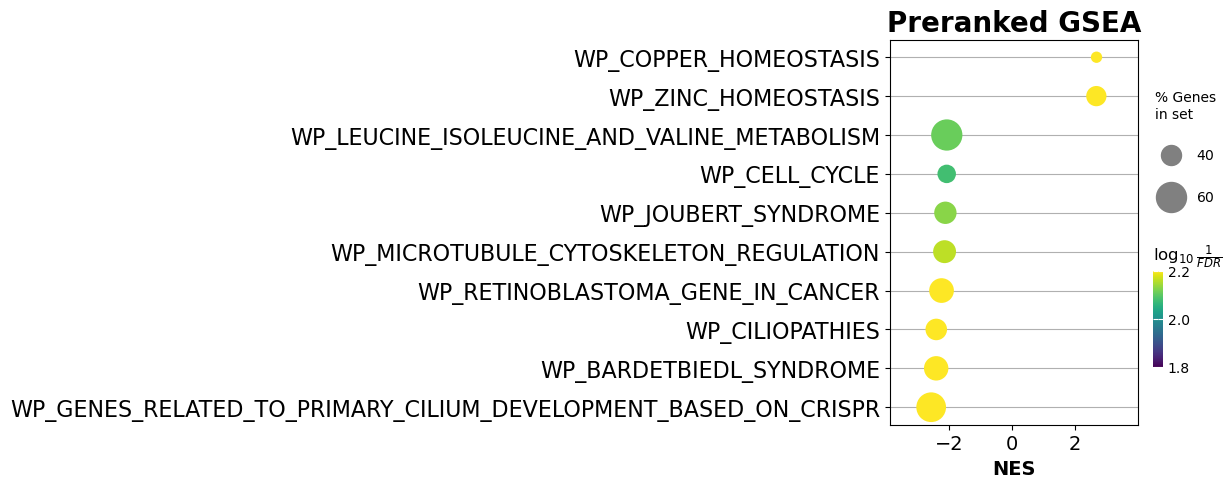

In [ ]:
ax1 = dotplot(Preranked_GSEA.res2d,
             column="FDR q-val",
             title='Preranked GSEA',
             cmap=plt.cm.viridis,
             size=6, # adjust dot size
             figsize=(4,5), cutoff=0.25, show_ring=False)

## Section 2: Traditional GSEA

In this section, traditional GSEA will be executed. This method allows for 5 ranking methods including: signal_to_noise, t_test, ratio_of_classes, diff_of_classes and log2_ratio_of_classes. In order to use this method, the following two files have to be prepared beforehand.

### Section 2.1 Generation of expression data frame

**Step 8.** Gene expression data dataframe will be generated in this step. The gene expression data file is a expression value table in which the sample names are placed horizontal and the gene names are placed vertical. This data was loaded and manipulated to meet GSEA guidelines.

In [ ]:
df= pd.read_csv('TraditionalGSEA-EMEXP3583.csv')
df.to_csv('TraditionalGSEA-EMEXP3583-version2.txt', sep='\t',index=False)
df2 = pd.read_csv("TraditionalGSEA-EMEXP3583-version2.txt",sep="\t", index_col=0)
df2 = df2.loc[:, ['M225-05', 'M225-01L', 'M225-03','M225-07']] 
TraditionalGSEA= df2.rename(columns={"M225-05": "Control", "M225-01L": "Control","M225-03": "Treatment","M225-07": "Treatment"})

In [ ]:
TraditionalGSEA

,Control,Control,Treatment,Treatment
EntrezID,,,,
1,7.941181,8.006905,7.990053,8.326014
10,4.473060,4.561733,4.546220,4.573649
100,10.246258,10.481636,10.297045,10.176861
1000,11.149919,11.145671,11.090569,11.116654
10000,10.274072,10.243285,10.226056,10.054899
...,...,...,...,...
9991,10.900741,10.551433,10.444575,10.473755
9992,5.068302,5.348781,5.664488,5.512333
9993,9.888579,10.014469,9.710480,9.798821


### Section 2.2 Generation of the CLS file

**Step 9.** The CLS file was created according to the GSEA guidelines. Based on the expression data, the following structure of the cls file was created and saved with a cls extension:

CLS file structure:

* First line : 4 2 1
* Second line: # Control Treatment
* Third line: 'Control' 'Control' 'Treatment' 'Treatment'

In [ ]:
with open("clsfile.cls", "w") as file:
    file.write("4 2 1\n")
    file.write("# Control Treatment \n")
    file.write("'Control' 'Control' 'Treatment' 'Treatment'\n")

### Section 2.3 Selection of the geneset

In this section, the geneset of interest can be selected. In this notebook, the ENTREZ ID version of WikiPathways 2024 Human will be used.

### Section 2.4 Execution of traditional GSEA

**Step 10.** Lastly traditional GSEA was executed. This requires setting the EntrezID as the index and maintenance of the same parameters as for preranked GSEA.

In [ ]:
TraditionalGSEA.reset_index('EntrezID', inplace=True)

In [ ]:
TraditionalGSEA['EntrezID'] = TraditionalGSEA['EntrezID'].astype(str)

In [ ]:
GSEA = gp.gsea(data=TraditionalGSEA, 
                 gene_sets='c2.cp.wikipathways.v2024.1.Hs.entrez.gmt', 
                 cls= "clsfile.cls", 
                 min_size=5, 
                 max_size=1000,
                 permutation_num=1000, 
                 permutation_type='gene_set',
                 outdir=None,  
                 method='log2_ratio_of_classes',
                 threads=4, 
                 verbose=True,
                 seed= 6)

2025-02-25 21:01:51,956 [INFO] Parsing data files for GSEA.............................
2025-02-25 21:01:52,125 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2025-02-25 21:01:52,126 [INFO] 0830 gene_sets used for further statistical testing.....
2025-02-25 21:01:52,131 [INFO] Start to run GSEA...Might take a while..................
2025-02-25 21:03:58,705 [INFO] Congratulations. GSEApy ran successfully.................



In [ ]:
print(GSEA.res2d.head())  

   Name                                               Term        ES  \
0  gsea  WP_GENES_RELATED_TO_PRIMARY_CILIUM_DEVELOPMENT...  0.557377   
1  gsea                                WP_ZINC_HOMEOSTASIS -0.775016   
2  gsea                            WP_BARDETBIEDL_SYNDROME   0.50323   
3  gsea                              WP_COPPER_HOMEOSTASIS -0.696479   
4  gsea  WP_REGULATION_OF_SISTER_CHROMATID_SEPARATION_A...  0.720957   

        NES NOM p-val FDR q-val FWER p-val   Tag %  Gene %  \
0  2.580045       0.0       0.0        0.0  50/101  21.25%   
1 -2.319458       0.0       0.0        0.0   13/37   4.76%   
2  2.290378       0.0  0.002076      0.002   40/86  19.31%   
3  -2.19289       0.0       0.0        0.0   12/53   7.55%   
4  2.130938       0.0  0.020764      0.029    4/14   4.81%   

                                          Lead_genes  
0  8100;55764;132320;23322;79659;57539;23059;1328...  
1  4495;4490;4501;4489;7780;4496;4494;4493;84560;...  
2  55764;132320;79659;2736;57

**Step 11.** In the next step, the results are displayed and visualized.

C:\Users\shaki\anaconda3\Lib\site-packages\gseapy\plot.py:738: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[self.colname] = df[self.colname].replace(0, np.nan).bfill()


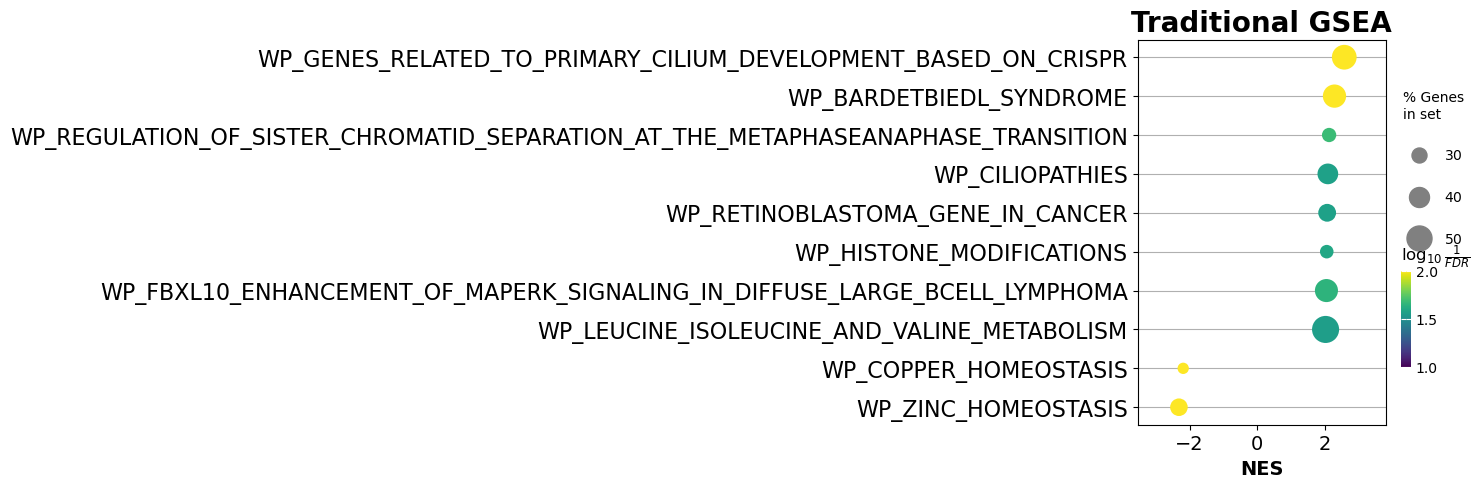

In [ ]:
ax2 = dotplot(GSEA.res2d,
             column="FDR q-val",
             title='Traditional GSEA',
             cmap=plt.cm.viridis,
             size=6, # adjust dot size
             figsize=(4,5), cutoff=0.25, show_ring=False)

## Section 3: fGSEA

In this section, fast GSEA (fGSEA) will be executed which is a package developed by BioConductor. To be able to use this package in this notebook, rpy2 was employed.

### Section 3.1 Magic R extension and system preparation

**Step 12.** We first activate rpy2 in this notebook. If a Windows laptop is used, the the warning 'quartz' may appear which can be ignored.

In [ ]:
%load_ext rpy2.ipython

C:\Users\shaki\anaconda3\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


**Step 13**. Next, the needed packages for fGSEA are installed. Dpending on the user's background and possible prior experience with R, notifications for updating packages may appear. These notifications can be answered at users discretion.

In [ ]:
%%R 
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("clusterProfiler")

R[write to console]: Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.1 (2024-06-14 ucrt)

R[write to console]: Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.1 (2024-06-14 ucrt)

R[write to console]: Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.4.1/library
  packages:
    class, cluster, foreign, KernSmooth, MASS, Matrix, nlme, nnet, rpart,
    spatial, survival

R[write to console]: Old packages: 'Biostrings', 'cli', 'data.table', 'ggnewscale', 'igraph',
  'IRanges', 'jsonlite', 'processx', 'R.utils', 'rlang', 'S4Vectors',
  'XVector', 'zlibbioc'



Update all/some/none? [a/s/n]: 

 n


In [ ]:
%%R 
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("fgsea")

R[write to console]: Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.1 (2024-06-14 ucrt)

R[write to console]: Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.4.1/library
  packages:
    class, cluster, foreign, KernSmooth, MASS, Matrix, nlme, nnet, rpart,
    spatial, survival

R[write to console]: Old packages: 'Biostrings', 'cli', 'data.table', 'ggnewscale', 'igraph',
  'IRanges', 'jsonlite', 'processx', 'R.utils', 'rlang', 'S4Vectors',
  'XVector', 'zlibbioc'



Update all/some/none? [a/s/n]: 

 n


In [ ]:
%%R
install.packages(c ("readr","ggplot2","data.table","dplyr"))

R[write to console]: Installing packages into 'C:/Users/shaki/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



--- Please select a CRAN mirror for use in this session ---

  There is a binary version available but the source version is later:
           binary source needs_compilation
data.table 1.16.4 1.17.0              TRUE



Do you want to install from sources the package which needs compilation? (Yes/no/cancel)  n


R[write to console]: trying URL 'https://mirror.lyrahosting.com/CRAN/bin/windows/contrib/4.4/readr_2.1.5.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 1223109 bytes (1.2 MB)

R[write to console]: downloaded 1.2 MB


R[write to console]: trying URL 'https://mirror.lyrahosting.com/CRAN/bin/windows/contrib/4.4/ggplot2_3.5.1.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 5021005 bytes (4.8 MB)

R[write to console]: downloaded 4.8 MB


R[write to console]: trying URL 'https://mirror.lyrahosting.com/CRAN/bin/windows/contrib/4.4/data.table_1.16.4.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 2669300 bytes (2.5 MB)

R[write to console]: downloaded 2.5 MB


R[write to console]: trying URL 'https://mirror.lyrahosting.com/CRAN/bin/windows/contrib/4.4/dplyr_1.1.4.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 1590307 bytes (1.5 MB)

R[wri

package 'readr' successfully unpacked and MD5 sums checked


R[write to console]: Warning:
R[write to console]:  cannot remove prior installation of package 'readr'

R[write to console]: Warning:
R[write to console]:  restored 'readr'



package 'ggplot2' successfully unpacked and MD5 sums checked
package 'data.table' successfully unpacked and MD5 sums checked


R[write to console]: Warning:
R[write to console]:  cannot remove prior installation of package 'data.table'

R[write to console]: Warning:
R[write to console]:  restored 'data.table'



package 'dplyr' successfully unpacked and MD5 sums checked


R[write to console]: Warning:
R[write to console]:  cannot remove prior installation of package 'dplyr'

R[write to console]: Warning:
R[write to console]:  restored 'dplyr'




The downloaded binary packages are in
	C:\Users\shaki\AppData\Local\Temp\RtmpMHB3pO\downloaded_packages


**Step 14**. Next, the installed libraries are loaded prior to use.

In [ ]:
%%R
library(fgsea)
library(ggplot2)
library(data.table)
library(readr)
library(clusterProfiler)
library(dplyr)

R[write to console]: data.table 1.16.4 using 4 threads (see ?getDTthreads).  
R[write to console]: Latest news: r-datatable.com

R[write to console]: 

R[write to console]: clusterProfiler v4.14.4 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

S Xu, E Hu, Y Cai, Z Xie, X Luo, L Zhan, W Tang, Q Wang, B Liu, R Wang,
W Xie, T Wu, L Xie, G Yu. Using clusterProfiler to characterize
multiomics data. Nature Protocols. 2024, 19(11):3292-3320

R[write to console]: 
Attaching package: 'clusterProfiler'


R[write to console]: The following object is masked from 'package:stats':

    filter


R[write to console]: 
Attaching package: 'dplyr'


R[write to console]: The following objects are masked from 'package:data.table':

    between, first, last


R[write to console]: The following objects are masked from 'package:stats':

    filter, lag


R[write to console]: The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### Section 3.2 Execution of fGSEA

**Step 15**. fGSEA can be executed by first loading the data. At this step, the rankData variable name will be created which contains the GeneID and log2FC column of data.

In [ ]:
%%R
data <- read_csv('topTable_Ag._.1.3_24 - H2O.control_.0.0_24-try.csv',show_col_types = FALSE)
rankData <- data$log2FC
names(rankData) <- data$GeneID
head(rankData)

R[write to console]: 
R[write to console]: indexing topTable_Ag._.1.3_24 - H2O.control_.0.0_24-try.csv [] 2.15GB/s, eta:  0s
                                                                                                                   
R[write to console]: 


    4490     4495    79974     4489     1638     4501 
3.935193 4.109887 2.532636 2.498127 2.349836 2.727981 


**Step 16**. Next, the geneset of interest is read into the variable name: 'pathway'.

In [ ]:
%%R
pathway <- gmtPathways("./c2.cp.wikipathways.v2024.1.Hs.entrez.gmt")

**Step 17**. Lastly, fgGSEA is run and results are displayed. Based on the NES and ES scores, we can see strong similarity to the values observed for the preranked GSEA.

In [ ]:
%%R
fgseaRes <- fgseaMultilevel(pathway, 
                  rankData, 
                  minSize=10, 
                  maxSize = 500)

fgseaRes %>% 
  arrange(desc(abs(NES))) %>% 
  top_n(10, -padj)

                                                           pathway         pval
                                                            <char>        <num>
 1:                                            WP_ZINC_HOMEOSTASIS 1.715256e-13
 2:                                          WP_COPPER_HOMEOSTASIS 2.229878e-14
 3: WP_GENES_RELATED_TO_PRIMARY_CILIUM_DEVELOPMENT_BASED_ON_CRISPR 4.747281e-11
 4:                                        WP_BARDETBIEDL_SYNDROME 2.087828e-09
 5:                                                WP_CILIOPATHIES 8.812615e-13
 6:                               WP_RETINOBLASTOMA_GENE_IN_CANCER 3.582750e-07
 7:                                            WP_JOUBERT_SYNDROME 2.022087e-06
 8:                                                  WP_CELL_CYCLE 6.050233e-07
 9:                                           WP_CILIARY_LANDSCAPE 8.578908e-09
10:       WP_OVERVIEW_OF_PROINFLAMMATORY_AND_PROFIBROTIC_MEDIATORS 4.518534e-06
            padj   log2err         ES   

In [ ]:
%%R

topPathwaysUp <- fgseaRes[ES > 0][head(order(pval), n=10), pathway]
topPathwaysDown <- fgseaRes[ES < 0][head(order(pval), n=10), pathway]
topPathways <- c(topPathwaysUp, rev(topPathwaysDown))
plotGseaTable(pathway[topPathways], rankData, fgseaRes, gseaParam=0.5)

**Conclusion:** *Using both methods of GSEA in GSEApy revealed that the ranking method affects the pattern in NES scores. Besides the debate on the best ranking method, the internal ranking in the traditional GSEA yields a different pattern compared to the explicit usage of log2FC in preranked GSEA. To further confirm the findings, fGSEA was executed which yielded NES scores and ES scores similar to preranked GSEA. The usage of logFC explicitly in preranked GSEA appears more in line with findings from other GSEA packages and descriptions of GSEA tutorials.*

## Section 4. Session information for Python and R

In this section, the session information for both Python and R used in this notebook will be displayed.

### Section 4.1: Python session information

In [ ]:
%load_ext watermark
%watermark

Last updated: 2025-02-25T21:10:34.996612+01:00

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

Compiler    : MSC v.1938 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit



### Section 4.2: R session information

In [ ]:
%%R
sessionInfo()

R version 4.4.1 (2024-06-14 ucrt)
Platform: x86_64-w64-mingw32/x64
Running under: Windows 11 x64 (build 26100)

Matrix products: default


locale:
[1] LC_COLLATE=Dutch_Netherlands.1252  LC_CTYPE=Dutch_Netherlands.1252   
[3] LC_MONETARY=Dutch_Netherlands.1252 LC_NUMERIC=C                      
[5] LC_TIME=Dutch_Netherlands.1252    

time zone: Europe/Amsterdam
tzcode source: internal

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] dplyr_1.1.4            clusterProfiler_4.14.4 readr_2.1.5           
[4] data.table_1.16.4      ggplot2_3.5.1          fgsea_1.32.2          
[7] BiocManager_1.30.25   

loaded via a namespace (and not attached):
 [1] tidyselect_1.2.1        farver_2.1.2            blob_1.2.4             
 [4] R.utils_2.12.3          Biostrings_2.73.2       lazyeval_0.2.2         
 [7] fastmap_1.2.0           digest_0.6.37           lifecycle_1.0.4        
[10] KEGGREST_1.46.0      

**References:**

1. Zhuoqing Fang, Xinyuan Liu, Gary Peltz, GSEApy: a comprehensive package for performing gene set enrichment analysis in Python, Bioinformatics, Volume 39, Issue January 2023, btac757, https://doi.org/10.1093/bioinformatics/btac757
2. Korotkevich G, Sukhov V, Sergushichev A (2019). “Fast gene set enrichment analysis.” bioRxiv. doi:10.1101/060012, http://biorxiv.org/content/early/2016/06/20/060012.
